First 5 rows of the Titanic dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       -

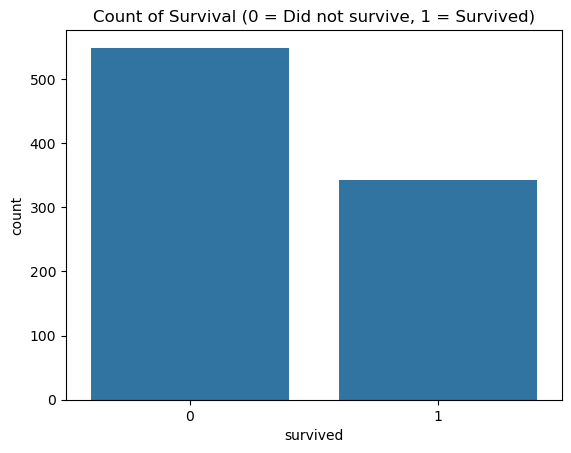

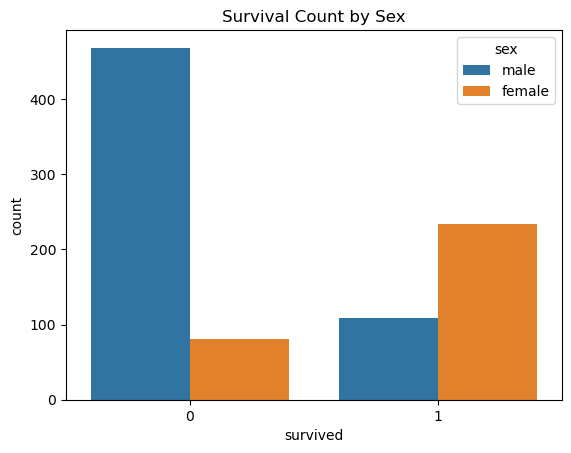

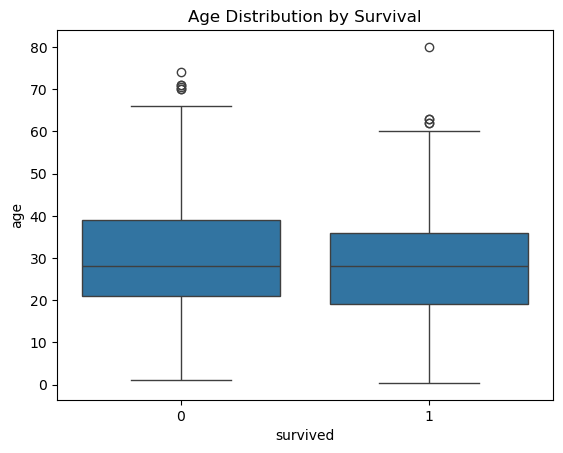

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
titanic = sns.load_dataset('titanic')

# Show first few rows
print("First 5 rows of the Titanic dataset:")
print(titanic.head())

# Overview of data info and missing values
print("\nDataset info:")
print(titanic.info())

print("\nMissing values per column:")
print(titanic.isnull().sum())

# Basic survival rate
survival_rate = titanic['survived'].mean()
print(f"\nOverall survival rate: {survival_rate:.2f}")

# Visualize survival count
sns.countplot(x='survived', data=titanic)
plt.title('Count of Survival (0 = Did not survive, 1 = Survived)')
plt.show()

# Visualize survival by sex
sns.countplot(x='survived', hue='sex', data=titanic)
plt.title('Survival Count by Sex')
plt.show()

# Visualize age distribution by survival
sns.boxplot(x='survived', y='age', data=titanic)
plt.title('Age Distribution by Survival')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Drop unnecessary columns
titanic = titanic.drop(columns=['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male'])

# Handle missing values with most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')
titanic[['age', 'embarked', 'fare']] = imputer.fit_transform(titanic[['age', 'embarked', 'fare']])

# Encode categorical variables with one-hot encoding
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked', 'alone'], drop_first=True)

# Define features and target
X = titanic.drop(columns=['survived'])
y = titanic['survived']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features (age and fare)
scaler = StandardScaler()
X_train[['age', 'fare']] = scaler.fit_transform(X_train[['age', 'fare']])
X_test[['age', 'fare']] = scaler.transform(X_test[['age', 'fare']])

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict 
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8212

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

